In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
%cd /content/gdrive/MyDrive/EPFL_course_project/ada-2022-homework-1-superplainteamname2022/01 - Pandas Data Wrangling and Data Viz

/content/gdrive/MyDrive/EPFL_course_project/ada-2022-homework-1-superplainteamname2022/01 - Pandas Data Wrangling and Data Viz


In [ ]:
!pwd

/content/gdrive/MyDrive/EPFL_course_project/ada-2022-homework-1-superplainteamname2022/01 - Pandas Data Wrangling and Data Viz


# Homework 1 (HW1)

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways; 
- Create meaningful visualizations to analyze the data;

---

## Important Dates

- Homework release: Fri 14 Oct 2022
- **Homework due**: Sat 29 Oct 2022, 23:59
- Grade release: Mon 07 Nov 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

In this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece. The homework contains four tasks: in task 1, we will process the data; in task 2, we will extract meaningful signals from the data; in task 3, we will test whether the language of headlines impacts their success; and in task 4, we will explore the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)). 
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails. 
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist). 
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece. 
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and ledes for the same news piece. 
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version. 
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece. 
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news. 
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](./example.png)

 ### **Where does this data come from?** 
 
 From a paper [1].

[1] Matias, J.N., Munger, K., Le Quere, M.A. et al. The Upworthy Research Archive, a time series of 32,487 experiments in U.S. media. Sci Data 8, 195 (2021). https://doi.org/10.1038/s41597-021-00934-7

### **Where can I find this data?**  

You can find it in the `/data/` folder.

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the lede, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 1) how many users were shown each package; and 2) how many individuals clicked each package.

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| created_at           | Time the package was created (timezone unknown)                                                                                                                                                   |   |   |   |
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling                                                                                       |   |   |   |
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID                                                                                                                     |   |   |   |
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id    |   |   |   |
| headline             | The headline being tested                                                                                                                                                                         |   |   |   |
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id                                                                                          |   |   |   |
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions                                   |   |   |   |
| excerpt              | Article excerpt                                                                                                                                                                                   |   |   |   |
| lede                 | The opening sentence or paragraph of the story                                                                                                                                                    |   |   |   |
| slug                 | Internal name for the web address                                                                                                                                                                 |   |   |   |
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website                                                   |   |   |   |
| square               | When used, part of the same social media sharing suggestion as the share text                                                                                                                     |   |   |   |
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages |   |   |   |
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose                                                                                                            |   |   |   |
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test                                                                                                          |   |   |   |
| updated_at           | The last time the package was updated in the Upworthy system                                                                                                                                      |   |   |   |


## Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

In [ ]:
import pandas as pd
import numpy as np

packages = pd.read_csv('./data/upworthy.csv.gz')
packages.head(10)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
5,2014-11-20 06:55:43.497,2016-04-02 16:25:54.034,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad38b2ce000027,3431,86,3.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
6,2014-11-20 06:55:57.651,2016-04-02 16:25:54.039,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad385a0a000038,3394,76,0.5,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
7,2014-11-20 06:56:08.696,2016-04-02 16:25:54.043,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad381bbe00002b,3505,95,11.6,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
8,2014-11-20 06:56:21.343,2016-04-02 16:31:48.08,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002f,3423,84,1.9,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
9,2014-11-20 13:23:11.221,2016-04-02 16:31:45.612,546deb3f26714cd2dd00003a,Things that matter. Pass 'em on.,Kim Jong Un Would Really Hate For You To Watch...,"<p>At age 21, Yeonmi Park is a brand new activ...",kim-jong-un-would-really-hate-for-you-to-watch...,545c477e74bfe7589400000b,3910,142,38.6,False,False,NaN,NaN,201446



1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. 
Last, plot the distribution of packages per experiment with a visualization of your choice.

There were 4822 experiments conducted in this dataset.
On average, 4.2727084197428455 packages were considered per experiment.


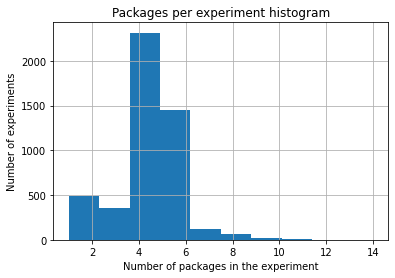

In [ ]:
import matplotlib.pyplot as plt

# How many different experiments were conducted in this dataset
# It's the number of unique values of `clickability_test_id`
num_experiments = packages['clickability_test_id'].nunique()
print(f"There were {num_experiments} experiments conducted in this dataset.")

# And, on average, how many packages were considered per experiment.
# Group by `clickability_test_id` and aggregate to get the size of each group, then take the mean.
avg_packages = packages.groupby('clickability_test_id').size().mean()
print(f"On average, {avg_packages} packages were considered per experiment.")

# Last, plot the distribution of packages per experiment with a visualization of your choice.
# plot a histogram
packages.groupby('clickability_test_id').size().hist()
plt.xlabel('Number of packages in the experiment')
plt.ylabel('Number of experiments')
_ = plt.title('Packages per experiment histogram')


1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

In [ ]:
packages['ctr'] = packages.clicks / packages.impressions
packages[['clicks', 'impressions', 'ctr']].head()

,clicks,impressions,ctr
0,150,3052,0.049148
1,90,3526,0.025525
2,120,3506,0.034227
3,98,3380,0.028994
4,75,3465,0.021645


1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [ ]:
# We group by experiments, and then use `filter` to keep only the groups with non-unique `headline` column.
filtered_by_headline = packages.groupby('clickability_test_id').filter(lambda group: group['headline'].nunique() > 1)
assert filtered_by_headline.groupby('clickability_test_id')['headline'].nunique().min() > 1

num_experiments_left = filtered_by_headline['clickability_test_id'].nunique()
print(f"{len(filtered_by_headline)} packages were left. {num_experiments - num_experiments_left} experiments were discarded.")

11600 packages were left. 2236 experiments were discarded.


1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [ ]:
# Same as above, just change 'headline' to 'eyecatcher_id'
filtered_by_eyecatcher_id = packages.groupby('clickability_test_id').filter(lambda group: group['eyecatcher_id'].nunique() > 1)
assert filtered_by_eyecatcher_id.groupby('clickability_test_id')['eyecatcher_id'].nunique().min() > 1

num_experiments_left = filtered_by_eyecatcher_id['clickability_test_id'].nunique()
print(f"{len(filtered_by_eyecatcher_id)} packages were left. {num_experiments - num_experiments_left} experiments were discarded.")

7930 packages were left. 3108 experiments were discarded.



1.6 **Discuss:** Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?


**Answer**: There are more experiments testing the effect of the headline than the effect of the image. It is possible that they think headline is a more important factor to test. But it's also possible that it's easier and cheaper to create different headlines to test.


1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first rows of your newly created dataframe, as well as its length.
-  the rows where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.


In [ ]:
# First do grouop by. Inside each group are the packages in the same experiment
# with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`.
# Note that it's possible that packages in different experiments have the same `eyecatcher_id`, `lede`, and `excerpt`,
# but we should only consider the packages in the same experiment.
grouped = packages.groupby(["clickability_test_id", "eyecatcher_id", "lede", "excerpt"])

# for each group, we build the pairwise combinations of the rows.
def pairwise_comparison(df: pd.DataFrame):
    from itertools import combinations

    res = []
    for (i, j) in list(combinations(df.index, 2)):
        pkg_1 = df.loc[i]
        pkg_2 = df.loc[j]
        # the rows where the two news pieces had exactly the same clickthrough rate should be filtered out
        if pkg_1.ctr == pkg_2.ctr:
            continue
        # Let pkg 1 have a higher ctr
        if pkg_1.ctr < pkg_2.ctr:
            (pkg_1, pkg_2) = (pkg_2, pkg_1)
        res.append(
            {
                "headline1": pkg_1.headline,
                "headline2": pkg_2.headline,
                "ctr1": pkg_1.ctr,
                "ctr2": pkg_2.ctr,
                "date_created": pkg_1.created_at,
            }
        )
    return pd.DataFrame(res)

# apply the function to each group
comparisons = grouped.apply(pairwise_comparison)
# the index is the group-by columns, we don't need them
comparisons = comparisons.reset_index(drop=True)

In [ ]:
# Show the first rows of the new data frame
comparisons.head()

,headline1,headline2,ctr1,ctr2,date_created
0,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.019770,0.016595,2013-02-07 05:42:25
1,MAD RESPECT: This Brave Woman Is Running For P...,This Brave Woman Is Running For President Of A...,0.011216,0.009410,2013-02-19 19:05:45
2,"If You Think Hillary Had A Rough Campaign, You...",MAD RESPECT: This Brave Woman Is Running For P...,0.012807,0.011216,2013-02-19 19:03:39
3,"If You Think Hillary Had A Rough Campaign, You...",This Brave Woman Is Running For President Of A...,0.012807,0.009410,2013-02-19 19:03:39
4,Sean Hannity Thinks Telling Men Not To Attack ...,Sean Hannity Thinks Its Waaaaay Too Hard To Te...,0.013675,0.013050,2013-03-09 06:55:39


In [ ]:
print(f"The length of the new data frame: {len(comparisons)}.")

The length of the new data frame: 15670.



1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`). 


In [ ]:
avg_ctr_diff = (comparisons.ctr1 - comparisons.ctr2).mean()
avg_least_ctr = comparisons.ctr2.mean()
print(f"The average clickthrough rate difference per pair is {avg_ctr_diff}.")
print(f"The average clickthrough rate for the least clicked through headline (`ctr2`) is {avg_least_ctr}.")

The average clickthrough rate difference per pair is 0.00413157086097192.
The average clickthrough rate for the least clicked through headline (`ctr2`) is 0.011020541327583174.



1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

In [ ]:
avg_ctr_diff / avg_least_ctr

0.3748972703029626

**Answer**: Headlines are impactful in the news business, because on average, the best headline can increase 0.004 (37%) clickthrough rate compared with the worst headline.

## Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data. 
We start this task from the dataset obtained in **T1.7**. 
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline. 
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser." 
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)
 
2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

2.3 One easy way to classify sentiment is simply to match negative or positive words. 
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

--- 

**Comments**

- For **T2.3**, beware of encodings!

In [ ]:
# 2.1 (provided code)
def count_words_simple(x):
    return len(x.split(" "))
str_test = "How many words are here?"
print(str_test, count_words_simple(str_test))


How many words are here? 5


In [ ]:
# 2.1 (answer)
comparisons['num_words1'] = comparisons.headline1.apply(count_words_simple)
comparisons['num_words2'] = comparisons.headline2.apply(count_words_simple)
comparisons.head()

,headline1,headline2,ctr1,ctr2,date_created,num_words1,num_words2
0,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.019770,0.016595,2013-02-07 05:42:25,9,15
1,MAD RESPECT: This Brave Woman Is Running For P...,This Brave Woman Is Running For President Of A...,0.011216,0.009410,2013-02-19 19:05:45,17,11
2,"If You Think Hillary Had A Rough Campaign, You...",MAD RESPECT: This Brave Woman Is Running For P...,0.012807,0.011216,2013-02-19 19:03:39,15,17
3,"If You Think Hillary Had A Rough Campaign, You...",This Brave Woman Is Running For President Of A...,0.012807,0.009410,2013-02-19 19:03:39,15,11
4,Sean Hannity Thinks Telling Men Not To Attack ...,Sean Hannity Thinks Its Waaaaay Too Hard To Te...,0.013675,0.013050,2013-03-09 06:55:39,11,14


In [ ]:
# 2.2 (provided code)
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])

In [ ]:
# 2.2 (answer)
# use set for fast lookup
def has_feature_word(text:str, feature_wordset: set):
    import string
    
    # Remove punctuation and convert to lower case. 
    # Some special characters are allowed, since they are included in the feature words.
    punctuation = set(string.punctuation) - set("'-+*")
    text = "".join([ch for ch in text.lower() if ch not in punctuation])
    # Split the text into words
    words = text.split()
    return int(any(word in feature_wordset for word in words))


str_test = "Am I happy? I am happy."
print(str_test, has_feature_word(str_test, set(feature_wordsets["first_person_singular"])))
print(str_test, has_feature_word(str_test, set(feature_wordsets["first_person_plural"])))
print(str_test, has_feature_word(str_test, set(['happy'])))


for pronoun, wordset in feature_wordsets.items():
    wordset = set(wordset)
    comparisons[pronoun + "1"] = comparisons.headline1.apply(
        has_feature_word, feature_wordset=wordset
    )
    comparisons[pronoun + "2"] = comparisons.headline2.apply(
        has_feature_word, feature_wordset=wordset
    )

comparisons.describe()

Am I happy? I am happy. 1
Am I happy? I am happy. 0
Am I happy? I am happy. 1


,ctr1,ctr2,num_words1,num_words2,first_person_singular1,first_person_singular2,first_person_plural1,first_person_plural2,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2
count,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000,15670.000000
mean,0.015152,0.011021,15.111870,14.837077,0.126420,0.109317,0.113338,0.122846,0.240970,0.237843,0.348947,0.319400,0.136822,0.134588
std,0.011931,0.009805,2.985947,3.142022,0.332333,0.312047,0.317015,0.328271,0.427686,0.425776,0.476652,0.466259,0.343670,0.341294
min,0.000220,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007468,0.004883,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012027,0.008217,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019131,0.013826,17.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,0.136063,0.127604,24.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 2.3
import requests

# get the word list from https://ptrckprry.com/course/ssd/data/positive-words.txt
# data starts from line 35
positive_words = requests.get("https://ptrckprry.com/course/ssd/data/positive-words.txt").text.splitlines()[35:]
assert positive_words[0] == 'a+' and positive_words[-1] == 'zippy'
negative_words = requests.get("https://ptrckprry.com/course/ssd/data/negative-words.txt").text.splitlines()[35:]
assert negative_words[0] == '2-faced' and negative_words[-1] == 'zombie'


for feature, wordset in {"positive": positive_words, "negative": negative_words}.items():
    wordset = set(wordset)
    comparisons[feature + "1"] = comparisons.headline1.apply(has_feature_word, feature_wordset=wordset)
    comparisons[feature + "2"] = comparisons.headline2.apply(has_feature_word, feature_wordset=wordset)
comparisons


,headline1,headline2,ctr1,ctr2,date_created,num_words1,num_words2,first_person_singular1,first_person_singular2,first_person_plural1,...,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2,positive1,positive2,negative1,negative2
0,"Mr. President, I'm Not Mad. I'm Just Disappoin...","Mr. President, I'm Not Mad. I'm Just Disappoin...",0.019770,0.016595,2013-02-07 05:42:25,9,15,1,1,0,...,0,0,0,0,0,0,0,0,1,1
1,MAD RESPECT: This Brave Woman Is Running For P...,This Brave Woman Is Running For President Of A...,0.011216,0.009410,2013-02-19 19:05:45,17,11,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2,"If You Think Hillary Had A Rough Campaign, You...",MAD RESPECT: This Brave Woman Is Running For P...,0.012807,0.011216,2013-02-19 19:03:39,15,17,0,0,0,...,1,0,0,0,0,0,0,1,1,1
3,"If You Think Hillary Had A Rough Campaign, You...",This Brave Woman Is Running For President Of A...,0.012807,0.009410,2013-02-19 19:03:39,15,11,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,Sean Hannity Thinks Telling Men Not To Attack ...,Sean Hannity Thinks Its Waaaaay Too Hard To Te...,0.013675,0.013050,2013-03-09 06:55:39,11,14,0,0,0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15665,Ever heard of the Battle of Blair Mountain? Fe...,Ever heard of the 'Second Civil War'? Federal ...,0.010323,0.007287,2015-04-28 19:42:13.416,18,16,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15666,Ever heard of the Battle of Blair Mountain? Fe...,Ever heard of the Battle of Blair Mountain? 13...,0.007480,0.004196,2015-04-28 19:36:38.098,16,16,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15667,Ever heard of the Battle of Blair Mountain? Fe...,Ever heard of the Battle of Blair Mountain? 13...,0.010323,0.004196,2015-04-28 19:42:13.416,18,16,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15668,Ever heard of the Battle of Blair Mountain? Fe...,Ever heard of the Battle of Blair Mountain? Fe...,0.010323,0.007480,2015-04-28 19:42:13.416,18,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

3.2 **Discuss:** Are longer headlines more successful? Justify.

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$
    
3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.
    
3.7 **Discuss:** When are paired t-tests helpful? Justify.

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.
    
---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n$\geq$30)!

### 3.1 Answer:

In [ ]:
##3.1
from scipy import stats
#independent sample t-test
stats.ttest_ind(comparisons['num_words1'],comparisons['num_words2'])

Ttest_indResult(statistic=7.935918556156672, pvalue=2.158660099169889e-15)

In [ ]:
##3.1
#paired t-test
stats.ttest_rel(comparisons['num_words1'],comparisons['num_words2'])

Ttest_relResult(statistic=9.58714274727263, pvalue=1.0387263148179284e-21)

In [ ]:
##3.1
import numpy as np
#calculate and print the mean difference between the number of words in the winner and the loser headlines.
mean_diff=np.mean(comparisons['num_words1']-comparisons['num_words2'])
print('The mean difference between the number of words in the winner and the loser headlines is: {}'.format(mean_diff))

The mean difference between the number of words in the winner and the loser headlines is: 0.2747925973197192


### 3.2 Answer:
Yes. Because both the independent sample t-test and the paired t-test show a very small p-value(much smaller than the common thresholds:5%, 1%, 0.5%, 0.1%), under the null hypothesis that winner headlines have same number words with the loser headline, which indicates that we should reject this null hypothesis. Besides, there is a positive mean difference between the number of words in the winner and the loser headlines

### 3.3 Answer:

In [ ]:
# 3.3
X = np.random.uniform(0, 1, size = 30)
Y = np.random.uniform(0, 1, size = 30)
Z = X / 2 + Y / 2 + 0.1
K = Y + 0.1

### 3.4 Answer:

| Statistic | X | Y | Z | K |
| ----------|---|---|---|---|
| Expected Value | 0.5 | 0.5 | 0.6 | 0.6 |
|Variance| 1/12 | 1/12 | 1/24 | 1/12 | 

### 3.5 Answer:

In [ ]:
#The null hypothesis is mean(X)=mean(Z), mean(X)=mean(K), which is false and should be rejected !!
p_ind_XZ_list = []
p_pair_XZ_list = []
p_ind_XK_list = []
p_pair_XK_list = []
iter_times = 10000
for i in range(iter_times):
  X = np.random.uniform(0, 1, size = 30)
  Y = np.random.uniform(0, 1, size = 30)
  Z = X / 2 + Y / 2 + 0.1
  K = Y + 0.1
  sta_ind_XZ, p_ind_XZ = stats.ttest_ind(X,Z)
  sta_pair_XZ, p_pair_XZ = stats.ttest_rel(X,Z)
  sta_ind_XK, p_ind_XK = stats.ttest_ind(X,K)
  sta_pair_XK, p_pair_XK = stats.ttest_rel(X,K)
  p_ind_XZ_list.append(p_ind_XZ)
  p_pair_XZ_list.append(p_pair_XZ)
  p_ind_XK_list.append(p_ind_XK)
  p_pair_XK_list.append(p_pair_XK)

### 3.6 Answer:

In [ ]:
##Statistical power, or the power of a hypothesis test is the probability that the test correctly rejects the null hypothesis.
sp_ind_XZ = len([i for i in p_ind_XZ_list if i<0.05])/len(p_ind_XZ_list)
sp_pair_XZ = len([i for i in p_pair_XZ_list if i <0.05])/len(p_pair_XZ_list)
sp_ind_XK = len([i for i in p_ind_XK_list if i <0.05])/len(p_ind_XK_list)
sp_pair_XK = len([i for i in p_pair_XK_list if i <0.05])/len(p_pair_XK_list)
print('Statistical power of the independent sample t-test comparing X and Z is: {}'.format(sp_ind_XZ))
print('Statistical power of the paired t-test comparing X and Z is: {}'.format(sp_pair_XZ))
print('Statistical power of the independent sample t-test comparing X and K is: {}'.format(sp_ind_XK))
print('Statistical power of the paired t-test comparing X and K is: {}'.format(sp_pair_XK))

Statistical power of the independent sample t-test comparing X and Z is: 0.2252
Statistical power of the paired t-test comparing X and Z is: 0.7365
Statistical power of the independent sample t-test comparing X and K is: 0.2545
Statistical power of the paired t-test comparing X and K is: 0.2472


### 3.7 Answer:
Paired t-tests are helpful when the two samples have correlations. As we can see from the statistical power results, paired t-test boosts the statistical power of compairing X and Z but doesn't have a positive influence on the statistical power of comparing X and K. As we can see from 3.3, X and Z are correlated while X and K are not correlated.



### 3.8 Answer:

first_person_singular,first_person_plural,second_person,third_person_singular,third_person_plural

In [ ]:
words_ratio = comparisons['num_words1']/comparisons['num_words2']
diff_pos_words = comparisons['positive1']-comparisons['positive2']
diff_neg_words = comparisons['negative1']-comparisons['negative2']
diff_fps = comparisons['first_person_singular1']-comparisons['first_person_singular2']
diff_fpp = comparisons['first_person_plural1']-comparisons['first_person_plural2']
diff_sp = comparisons['second_person1']-comparisons['second_person2']
diff_tps = comparisons['third_person_singular1']-comparisons['third_person_singular2']
diff_tpp = comparisons['third_person_plural1']-comparisons['third_person_plural2']

Steps:
1. For n data points, we construct 10000 sets, each by sampling n datapoints with replacement
2. We then compute the mean value of the samples in each set, and get an estimated mean
3. The CI is defined by the 2.5%*sample_points-th element and 97.5%*sample_points-th element for 95 CI

In [ ]:
def bootstraping(sample, alpha = 0.05):
  # resample_list = []
  lower_cut = alpha / 2.0
  upper_cut = 1 - alpha / 2.0
  resample_mean = []
  num_point = len(sample)
  sample_points = 10000
  for i in range(sample_points):
    #For n data points, we construct 10000 sets, each by sampling n datapoints with replacement
    resample_idx = np.random.choice(num_point,num_point,replace=True)
    #Compute the mean value of the samples in each set
    resample_mean.append(np.mean(sample[resample_idx]))
  avg = sum(resample_mean)/len(resample_mean)
  #Sort the mean in ascending order.
  sort_mean = sorted(resample_mean)
  #The CI is defined by the 2.5%*sample_points-th element and 97.5%*sample_points-th element for 95 CI
  cl_low = sort_mean[int(lower_cut*sample_points)]
  cl_high = sort_mean[int((upper_cut)*sample_points)]
  return avg,(cl_low,cl_high)


Steps:
1. Construct 95 CI for each attribute, get the estimated average value for free!
2. Look the range of each 95 CI. If 0 (1 for ratio) is in it, it means that we cannot reject 0 as null hypothesis, which means 0 difference can explain our data, indicating not affecting winner and loser. 

In [ ]:
avg_words_ratio, cl_words_ratio = bootstraping(words_ratio.values)
avg_diff_pos_words,cl_diff_pos_words = bootstraping(diff_pos_words.values)
avg_diff_neg_words,cl_diff_neg_words = bootstraping(diff_neg_words.values)
avg_diff_fps,cl_diff_fps = bootstraping(diff_fps.values)
avg_diff_fpp,cl_diff_fpp = bootstraping(diff_fpp.values)
avg_diff_sp,cl_diff_sp = bootstraping(diff_sp.values)
avg_diff_tps,cl_diff_tps = bootstraping(diff_tps.values)
avg_diff_tpp,cl_diff_tpp = bootstraping(diff_tpp.values)
pd.DataFrame(
    [
        ["avg words ratio", avg_words_ratio, cl_words_ratio],
        ["avg diff positive", avg_diff_pos_words, cl_diff_pos_words],
        ["avg diff negative", avg_diff_neg_words, cl_diff_neg_words],
        ["avg diff first person singular", avg_diff_fps, cl_diff_fps],
        ["avg diff first person plural", avg_diff_fpp, cl_diff_fpp],
        ["avg diff second person", avg_diff_sp, cl_diff_sp],
        ["avg diff third person singular", avg_diff_tps, cl_diff_tps],
        ["avg diff third person plural", avg_diff_tpp, cl_diff_tpp],
    ],
    columns=["feature", "avg", "confidence interval"],
).set_index("feature")

,avg,confidence interval
feature,,
avg words ratio,1.061695,"(1.0567366368021187, 1.0667021668364682)"
avg diff positive,-0.002611,"(-0.01225271218889598, 0.007019783024888321)"
avg diff negative,0.020990,"(0.01186981493299298, 0.029929802169751118)"
avg diff first person singular,0.017079,"(0.010784939374601149, 0.02335673261008296)"
avg diff first person plural,-0.009444,"(-0.015507338864071475, -0.0034460753031269943)"
avg diff second person,0.003088,"(-0.005041480536056158, 0.01129546904913848)"
avg diff third person singular,0.029585,"(0.020867900446713467, 0.03803446075303127)"
avg diff third person plural,0.002222,"(-0.004403318442884493, 0.008742820676451818)"


### 3.9 Answer:
Headlines with more words and more negative words and with third_person_singular as well as first person singular grab people's attention the most. We can see that all those four features have a CI that does not include 0 in it, which means that the null hypotheses that those four features are equal in winner and loser cases are rejected. Therefore, we conclude that those four features grab people's attention.

## Task 4: Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 


### 4.1 Answer:

Steps:
1. First convert the date column to standard format and query with required conditions.
2. Sort the dataframe according to year and month to better perform time-related tasks.
3. For the attribute in question, numword here, construct the 95 CI for it and plot the estimated mean and 95 CI with plt.errorbar

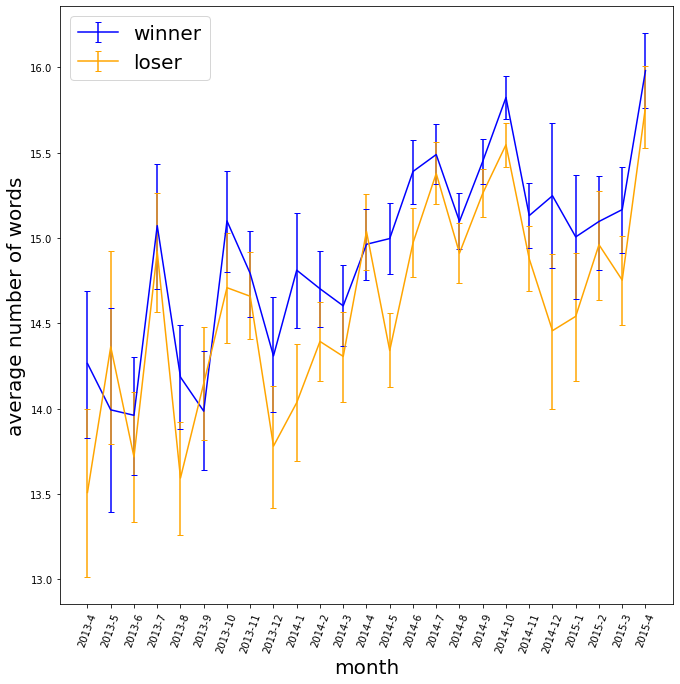

In [ ]:
##4.1
time_split = pd.to_datetime(comparisons['date_created'])
comparisons['years'] = time_split.apply(lambda x: x.year)
comparisons['month'] = time_split.apply(lambda x: x.month)
comparisons_time = comparisons.query('years > 2013 | (years==2013 & month >= 4)')
comparisons_time_sorted = comparisons_time.sort_values(by = ['years','month'], ascending = [True, True])
num_words =comparisons_time_sorted[['num_words1','num_words2','years','month']].groupby(['years','month'])

num_words_monthavg1 = []
cl_words_monthavg1_low = []
cl_words_monthavg1_high = []
num_words_monthavg2 = []
cl_words_monthavg2_low = []
cl_words_monthavg2_high = []
month_id_list = []
for i, (month_id, group) in enumerate(num_words):
  month_id_list.append(str(month_id[0])+'-'+str(month_id[1]))
  avg_num_words_permonth1, cl_num_words_permonth1 = bootstraping(group['num_words1'].values)
  avg_num_words_permonth2, cl_num_words_permonth2 = bootstraping(group['num_words2'].values)
  num_words_monthavg1.append(avg_num_words_permonth1)
  cl_words_monthavg1_low.append(cl_num_words_permonth1[0])
  cl_words_monthavg1_high.append(cl_num_words_permonth1[1])
  num_words_monthavg2.append(avg_num_words_permonth2)
  cl_words_monthavg2_low.append(cl_num_words_permonth2[0])
  cl_words_monthavg2_high.append(cl_num_words_permonth2[1])
plt.figure(figsize=(11,11))
cl_words_monthavg1_low = np.array(cl_words_monthavg1_low)
cl_words_monthavg1_high = np.array(cl_words_monthavg1_high)
num_words_monthavg1 = np.array(num_words_monthavg1)

cl_words_monthavg2_low = np.array(cl_words_monthavg2_low)
cl_words_monthavg2_high = np.array(cl_words_monthavg2_high)
num_words_monthavg2 = np.array(num_words_monthavg2)

plt.errorbar(month_id_list, num_words_monthavg1, yerr = [num_words_monthavg1 - cl_words_monthavg1_low, \
                                -num_words_monthavg1 + cl_words_monthavg1_high],\
                                label='winner', color = 'blue', capsize = 3)
plt.errorbar(month_id_list, num_words_monthavg2, yerr = [num_words_monthavg2 - cl_words_monthavg2_low, \
                                -num_words_monthavg2 + cl_words_monthavg2_high], \
                                label='loser', color = 'orange', capsize = 3)

plt.xticks(rotation=70)
plt.xlabel('month',fontsize=20)
plt.ylabel('average number of words',fontsize=20)
plt.legend(fontsize=20)
plt.show()

### 4.2 Answer:

Steps:
1. First combine winner and loser values since it is asked for a mean across them. 
2. Use subplot to draw many plots inside a 11*11 figure.
3. For the attribute in question, numword here, construct the 95 CI for it and plot the estimated mean and 95 CI with plt.errorbar
4. Delete unused plots 

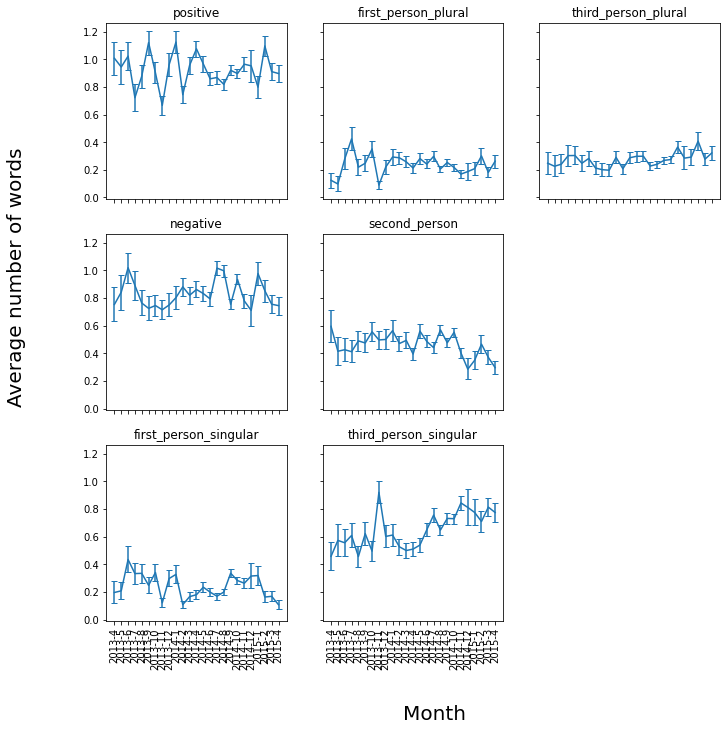

In [ ]:
##4.2
attributes = ['positive','negative','first_person_singular','first_person_plural','second_person','third_person_singular','third_person_plural']
# create a 3*3 plot canvas with size 11inch*11inch
ig, ax = plt.subplots(3,3,figsize= (11,11), sharey = True, sharex = True)

for plt_idx, attribute in enumerate(attributes):
  # add cross winner and loser
  comparisons_time_sorted[attribute] = comparisons_time_sorted[attribute+'1']+comparisons_time_sorted[attribute+'2']
  num_words_attr = comparisons_time_sorted[[attribute,'years','month']].groupby(['years','month'])
  num_words_attr_monthavg = []
  num_words_attr_cl_low = []
  num_words_attr_cl_high = []
  month_id_list = []
  for i, (month_id, group) in enumerate(num_words_attr):
    month_id_list.append(str(month_id[0])+'-'+str(month_id[1]))
    # bootstrap to estimate mean and 95CI
    avg_num_words_attr_permonth, cl_num_words_attr_permonth = bootstraping(group[attribute].values)
    num_words_attr_monthavg.append(avg_num_words_attr_permonth)
    num_words_attr_cl_low.append(cl_num_words_attr_permonth[0])
    num_words_attr_cl_high.append(cl_num_words_attr_permonth[1])
  num_words_attr_monthavg = np.array(num_words_attr_monthavg)
  num_words_attr_cl_low = np.array(num_words_attr_cl_low)
  num_words_attr_cl_high = np.array(num_words_attr_cl_high)
  sbplt = ax[plt_idx % 3, plt_idx // 3]
  
  sbplt.errorbar(month_id_list, num_words_attr_monthavg, yerr = [num_words_attr_monthavg - num_words_attr_cl_low, \
                                  -num_words_attr_monthavg + num_words_attr_cl_high], capsize=3)
  sbplt.tick_params(axis='x', rotation=90)
  sbplt.set_title(attribute)
for ax_single in ax.flat:
  ## check if something was plotted 
  if not bool(ax_single.has_data()):
    fig.delaxes(ax_single)
fig.text(0.5,0, "Month", fontsize=20)
fig.text(0,0.4, "Average number of words", rotation = 90, fontsize=20)
plt.show()


### 4.3 Answer:


1. Treat trend of change as the slope of a linear-regression fit. Also get p-value for free to check whether the trend is statistically significant.
2. Plot the value of ctr as a indicator of "headline engaging score". Check the trend.
3. See the correlations between all statistically significant trends and trend of ctr. (both up? both down? up-down?)

P value of linear regression of all attributes: 
ctr 2.8773061189421568e-06
positive 0.8878983971896315
negative 0.8180490313214869
first_person_singular 0.17450217559919895
first_person_plural 0.9907473811153938
second_person 0.02664239548176582
third_person_singular 0.0003474060155877683
third_person_plural 0.014273309367102503


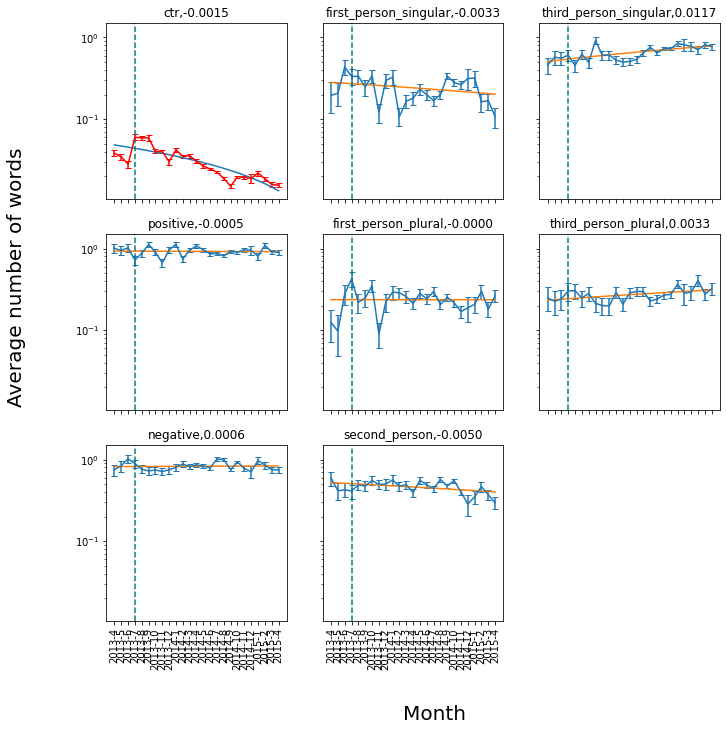

In [ ]:
import statsmodels.formula.api as smf
attributes = ['ctr', 'positive','negative','first_person_singular','first_person_plural','second_person','third_person_singular','third_person_plural']
fig, ax = plt.subplots(3,3,figsize= (11,11), sharey = True, sharex = True)
p_value_dict = {}
for plt_idx, attribute in enumerate(attributes):
  comparisons_time_sorted[attribute] = comparisons_time_sorted[attribute+'1']+comparisons_time_sorted[attribute+'2']
  num_words_attr = comparisons_time_sorted[[attribute,'years','month']].groupby(['years','month'])
  num_words_attr_monthavg = []
  num_words_attr_cl_low = []
  num_words_attr_cl_high = []
  month_id_list = []
  for i, (month_id, group) in enumerate(num_words_attr):
    month_id_list.append(str(month_id[0])+'-'+str(month_id[1]))
    avg_num_words_attr_permonth, cl_num_words_attr_permonth = bootstraping(group[attribute].values)
    num_words_attr_monthavg.append(avg_num_words_attr_permonth)
    num_words_attr_cl_low.append(cl_num_words_attr_permonth[0])
    num_words_attr_cl_high.append(cl_num_words_attr_permonth[1])
  num_words_attr_monthavg = np.array(num_words_attr_monthavg)
  num_words_attr_cl_low = np.array(num_words_attr_cl_low)
  num_words_attr_cl_high = np.array(num_words_attr_cl_high)
  sbplt = ax[plt_idx % 3, plt_idx // 3]
  if(attribute == 'ctr'):
    sbplt.errorbar(month_id_list, num_words_attr_monthavg, yerr = [num_words_attr_monthavg - num_words_attr_cl_low, \
                                  -num_words_attr_monthavg + num_words_attr_cl_high], capsize=3, color = 'red')
  else:
    sbplt.errorbar(month_id_list, num_words_attr_monthavg, yerr = [num_words_attr_monthavg - num_words_attr_cl_low, \
                                  -num_words_attr_monthavg + num_words_attr_cl_high], capsize=3)
  regression_dict = {'x':np.arange(len(num_words_attr_monthavg)), 'y':num_words_attr_monthavg}

  # linear regression on values and time
  mod = smf.ols(formula='y ~ x', data=regression_dict)
  res = mod.fit()
  b, m = res.params.values
  p_value = res.pvalues['x']
  p_value_dict[attribute] = p_value
  #add linear regression line to scatterplot 
  sbplt.plot(np.arange(len(num_words_attr_monthavg)), m*np.arange(len(num_words_attr_monthavg))+b)
  sbplt.tick_params(axis='x', rotation=90)
  sbplt.set_title(f"{attribute},{'%.4f' % m}")
  sbplt.axvline(x=3, color='teal',ls='--')

plt.yscale('log', nonposy='clip')
for ax_single in ax.flat:
  ## check if something was plotted 
  if not bool(ax_single.has_data()):
    fig.delaxes(ax_single)
print('P value of linear regression of all attributes: ')
for key in p_value_dict:
  print(key, p_value_dict[key])
fig.text(0.5,0, "Month", fontsize=20)
fig.text(0,0.4, "Average number of words", rotation = 90, fontsize=20)
plt.show()

## 4.3 Analysis: 
We plot values of all the attributes over time, and also the click through rate (ctr) over time in red color. Since the overall values of ctr are small, we change the y-axis to log scale to observe the trend. We also use a linear function to fit the data, to see whether the slope is higher or lower than 0, and present the p-value for that slope. Positive slope indicates an overall increasing trend while a negative one indicates a decreasing trend. From the result we can see that there is 1 slope that is statistically significant: third_person_singular, under Šidák corrected α=1-(1-0.05)^8=0.00639. Checking the slope, we can it has an increasing trend.

We can see that the clickthrough rate has a significant decreasing trend. Therefore, we can conclude that increase in third_person_singular is LIKELY to produce less engaging headlines.

Additional: We see from the figure that there is an increase from 2013-06 to 2013-07 and after 2013-07 there is a clear decreasing trend. We plot a vertical dotted line on that month. Checking all the plots, we can see that there is a big increasing trend in first_person_plural usage. This might indicate that at that time people liked first_person_plural in the headlines.

### 4.4 Answer:

Steps:
1. Use the obtained date to query the dataframe and sort by date

In [ ]:
# t1 \in [2013.04,2014.03], t2 \in (2014.04,latest)
comparisons_t1 = comparisons.query('(years==2014 & month <= 3) | (years==2013 & month >= 4)')
comparisons_t1_sorted = comparisons_t1.sort_values(by = ['years','month'], ascending = [True, True])
comparisons_t2 = comparisons.query('(years==2014 & month > 3) | years > 2014')
comparisons_t2_sorted = comparisons_t2.sort_values(by = ['years','month'], ascending = [True, True])
# comparisons_t1_sorted

### 4.5 Answer:


Steps:
1. Adjust alpha!!!!
2. For each attribute, compute the difference between winner and loser in two time periods. 
3. Construct the changed-alpha CI for that difference, if the CI contains 0 it means that no difference between usage of that attribute in winner and loser and thus no effect. 
4. Observe whether there woule be CIs that exclude or include 0 into it between t1 and t2 and conclude the effect changing.

In [ ]:
attr_list = ['numwords', 'positive','negative','first_person_singular','first_person_plural','second_person','third_person_singular','third_person_plural']
num_hypo = len(attr_list)
alpha = 0.05
sidak_alpha = 1 - (1-alpha) ** (1 / num_hypo)
diff_dict_t1 = {}
diff_dict_t2 = {}
diff_CI_dict_t1 = {}
diff_CI_dict_t2 = {}
avg_dict_t1 = {}
avg_dict_t2 = {}
for attr in attr_list:
  if(attr == 'numwords'):
    diff_dict_t1['numwords'] = np.array(comparisons_t1_sorted['num_words1']/comparisons_t1_sorted['num_words2'])
    diff_dict_t2['numwords'] = np.array(comparisons_t2_sorted['num_words1']/comparisons_t2_sorted['num_words2'])
    avg_dict_t1['numwords'], diff_CI_dict_t1['numwords'] = bootstraping(diff_dict_t1['numwords'], sidak_alpha)
    avg_dict_t2['numwords'], diff_CI_dict_t2['numwords'] = bootstraping(diff_dict_t2['numwords'], sidak_alpha)
  else:
    diff_dict_t1[attr] = np.array(comparisons_t1_sorted[f'{attr}1']-comparisons_t1_sorted[f'{attr}2'])
    diff_dict_t2[attr] = np.array(comparisons_t2_sorted[f'{attr}1']-comparisons_t2_sorted[f'{attr}2'])
    avg_dict_t1[attr], diff_CI_dict_t1[attr] = bootstraping(diff_dict_t1[attr], sidak_alpha)
    avg_dict_t2[attr], diff_CI_dict_t2[attr] = bootstraping(diff_dict_t2[attr], sidak_alpha)
print('Adjusted Alpha: ', sidak_alpha)
for key in diff_CI_dict_t1:
  print('Attribute: ', key, ',Mean Difference in t1: ', '%.4f' % avg_dict_t1[key], ',CI in t1: ', diff_CI_dict_t1[key],',Mean Difference in t2: ', '%.4f' % avg_dict_t2[key],  ',CI in t2: ', diff_CI_dict_t2[key])


Adjusted Alpha:  0.006391150954545011
Attribute:  numwords ,Mean Difference in t1:  1.0681 ,CI in t1:  (1.054706962409403, 1.0823260755892574) ,Mean Difference in t2:  1.0587 ,CI in t2:  (1.05076827643888, 1.0665464548964814)
Attribute:  positive ,Mean Difference in t1:  0.0052 ,CI in t1:  (-0.020192533458558346, 0.031227987790561164) ,Mean Difference in t2:  -0.0060 ,CI in t2:  (-0.022620001781102503, 0.010330394514204292)
Attribute:  negative ,Mean Difference in t1:  0.0411 ,CI in t1:  (0.018079361352430146, 0.06456914768725053) ,Mean Difference in t2:  0.0144 ,CI in t2:  (-0.0008905512512245079, 0.029655356665776116)
Attribute:  first_person_singular ,Mean Difference in t1:  0.0128 ,CI in t1:  (-0.002817562808170932, 0.028645221883071142) ,Mean Difference in t2:  0.0198 ,CI in t2:  (0.009439843262979784, 0.030367797666755722)
Attribute:  first_person_plural ,Mean Difference in t1:  -0.0092 ,CI in t1:  (-0.02582765907490021, 0.0068091101197464195) ,Mean Difference in t2:  -0.0093 ,CI

## 4.5 Analysis
Since we are considering 8 hypotheses, we perform a Šidák correction on the significance level α=1-(1-0.05)^8=0.00639, where 0.05 is the original α. Then, we construct a (1-α/2) confidence interval for each attributes, concerning the difference of that attribute between winner and loser. The logic is that if 0 is in the CI then it indicates that there is no effect of that attribute to winner or loser, because we cannot reject 0 (1 for ratio) as the difference between the attribute on winner and loser, assuming no effect. Observing the result, we can see that the effects of the usage of negative word, first_person_singular, and third_person_plural have changed between t1 and t2. 

Case study: 
1. In t1, the usage of negative word can produce more engaging headlines while in t2 the effect has gone.
2. In t1, the usage of first_person_singular has no effect but in t2 it has a positive effect on generating more engaging headlines. 
3. In t1, the usage of third_person_plural can produce more engaging headlines while in t2 the effect has gone.

### 4.6 Answer:
Two reasons: 
1. People prefer news that are presented by the person who experienced it (using first_person_singular, I've gone to the White House...) rather than being told by others without a specific protagonist (using third_person_plural, they went to the White House...).
2. People realize that many news' headline with negative words are just for grabbing the attention but without solid material. (change of effect in negative word)

Analysis of change refers to T4.5. 

### 4.7 Answers:

In [ ]:
comparisons_pos = comparisons.query('positive1 == 1 & positive2==1')
comparisons_neg = comparisons.query('negative1 == 0 & negative2==0')

## 4.8 Answer

Steps:
1. Compute the difference of usage of first_person_singular between winner and loser in two dataframes.
2. Construct a 95 CI for each averaged difference.
3. See the overlap between CI to decide whether the two difference can be significant different.

In [ ]:
diff_fps_pos=np.array(comparisons_pos['first_person_singular1']-comparisons_pos['first_person_singular2'])
diff_fps_neg=np.array(comparisons_neg['first_person_singular1']-comparisons_neg['first_person_singular2'])
avg_pos, CI_pos = bootstraping(diff_fps_pos)
avg_neg, CI_neg = bootstraping(diff_fps_neg)
print('Average difference of FPS in winner and loser both with positive headline:', avg_pos, '95 CI: ', CI_pos)
print('Average difference of FPS in winner and loser both with negative headline:', avg_neg, '95 CI: ', CI_neg)

Average difference of FPS in winner and loser both with positive headline: 0.01497189718482254 95 CI:  (0.0026927784577723377, 0.027172582619339046)
Average difference of FPS in winner and loser both with negative headline: 0.011133890290037881 95 CI:  (0.0014186633039092057, 0.02096469104665826)


### 4.8 Analysis:
From the result we can see that in two dataframes the differences of first person singular between winner and loser are both positive and have 95 CI without 0 in it, indicating that in both dataframes they have positive effect on generating winner headlines. The bootstrapped estimated mean is larger in dataframe with all positive headline than the one with all negative headline, indicating a larger effect size. However, their confidence intervals are largely overlapped so we conclude that the effect in positive dataframe is larger than the one in negative dataframe but not significantly. 

### 4.9 Answer:
In task 3.8 we can see that more words, using negative words, third_person_singular and first person singular can contribute to a more engaging headline. However, the effects do not remain the same during the whole time period. After April 2014, the effect of negative words has gone while the one of first person singular emerges. Therefore, we suggest Upworthy employees use more first person singular in headlines. According to T4.7&4.8, when there is a positve word in the headlines, the effect of using first person singular can be even larger, although not statistically significant.Therefore, we suggest Upworthy employees use more first person singular combined with positive words to grab people's eyes. Moreover, although using negative words seemingly contribute to a more engaging headline when analyzing the whole data, we can see from T4.5 that the effect has gone after April 2014. So do not use negative words anymore. Finally, longer headlines seem always helpful to attract people so extend the headline even if there might be a compact version!